In [ ]:
### BEGIN "Data Collection/Cleaning" NOTEBOOK'S WORK
import pandas as pd
import requests
cleaned = []
#SM 081
#LA 037
#SLO 079
for county_code in ["081", "037", "079"]:
  df_all = []
  for i in range(1998, 2019):
    if i in range(1998, 2003):
      response = requests.get("https://api.census.gov/data/" + str(i) + "/cbp?get=NAICS1997,NAICS1997_TTL,EMP,PAYANN,ESTAB&for=county:" + county_code + "&in=state:06&key=451427d6735c3eabbe226567a036b078171fd967")
    elif i in range(2003, 2008):
      response = requests.get("https://api.census.gov/data/" + str(i) + "/cbp?get=NAICS2002,NAICS2002_TTL,EMP,PAYANN,ESTAB&for=county:" + county_code + "&in=state:06&key=451427d6735c3eabbe226567a036b078171fd967")
    elif i in range(2008, 2012):
      response = requests.get("https://api.census.gov/data/" + str(i) + "/cbp?get=NAICS2007,NAICS2007_TTL,EMP,PAYANN,ESTAB&for=county:" + county_code + "&in=state:06&key=451427d6735c3eabbe226567a036b078171fd967")
    elif i in range(2012, 2017):
      response = requests.get("https://api.census.gov/data/" + str(i) + "/cbp?get=NAICS2012,NAICS2012_TTL,EMP,PAYANN,ESTAB&for=county:" + county_code + "&in=state:06&key=451427d6735c3eabbe226567a036b078171fd967")
    elif i in range(2017, 2019):
      response = requests.get("https://api.census.gov/data/" + str(i) + "/cbp?get=NAICS2017,NAICS2017_LABEL,EMP,PAYANN,ESTAB&for=county:" + county_code + "&in=state:06&key=451427d6735c3eabbe226567a036b078171fd967")
    df = pd.DataFrame(response.json()[1:], columns=["Code", "Title", "EMP", "PAYANN", "ESTAB", "state", "county"])
    df["Year"] = i
    df["state"] = df["state"].astype(int)
    df_all.append(df)
  concatted_counties = pd.concat(df_all, ignore_index=True)
  concatted_counties["Code"] = concatted_counties["Code"].map(lambda x : x.strip())
  cleaned.append(concatted_counties)
  ### END "Data Collection/Cleaning" NOTEBOOK'S WORK

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

<h1>SAN MATEO COUNTY</h1>

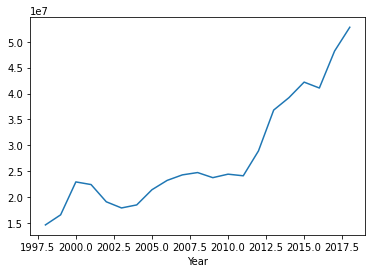

In [ ]:
state_1 = cleaned[0].copy()
state_1["Year"] = state_1["Year"].astype(int)
state_1.set_index(["Code", "Year"], inplace = True)
state_1["EMP"] = state_1["EMP"].astype(int)
state_1["PAYANN"] = state_1["PAYANN"].astype(int)
state_1["ESTAB"] = state_1["ESTAB"].astype(int)
state_1.loc["00"]["PAYANN"].plot()

In [ ]:
industries = state_1[state_1.index.map(lambda x: len(x[0]) == 3 and x[0] != "00" and len(x) == 2)]
ind_2018 = industries[industries.index.map(lambda x: x[1] == 2018)]
ind_2018 = ind_2018.reset_index().set_index("Code")
top_2018 = ind_2018.sort_values(by="PAYANN", ascending=False).iloc[0:10]
top_2018

,Year,Title,EMP,PAYANN,ESTAB,state,county
Code,,,,,,,
519,2018,Other information services,23700,12000380,104,6,081
541,2018,"Professional, scientific, and technical services",42546,6649334,3329,6,081
511,2018,Publishing industries (except internet),21973,5767581,254,6,081
424,2018,"Merchant wholesalers, nondurable goods",11133,2856825,393,6,081
325,2018,Chemical manufacturing,11800,2669968,38,6,081
523,2018,"Securities, commodity contracts, and other fin...",6366,2249909,550,6,081
481,2018,Air transportation,20986,2071824,50,6,081
522,2018,Credit intermediation and related activities,9045,2035204,377,6,081
621,2018,Ambulatory health care services,18346,1727767,1620,6,081


In [ ]:
industries = industries.reset_index().set_index("Code")
industries = industries[industries.index.map(lambda x: x in list(top_2018.index))]
industries = industries.reset_index().set_index(["Code", "Year"])

Other information services
Number of Establishments


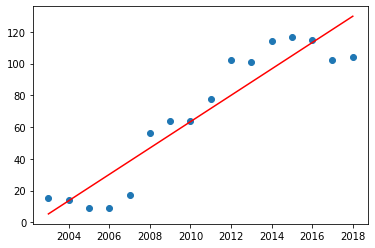

Number of Employees


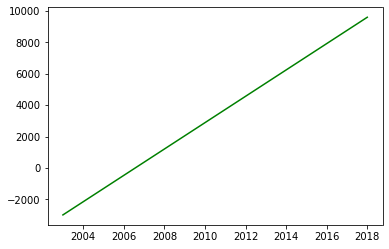



Professional, scientific, and technical services
Number of Establishments


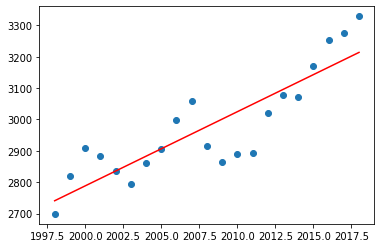

Number of Employees


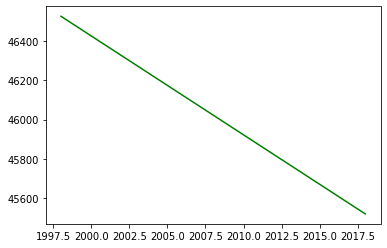



Publishing industries (except internet)
Number of Establishments


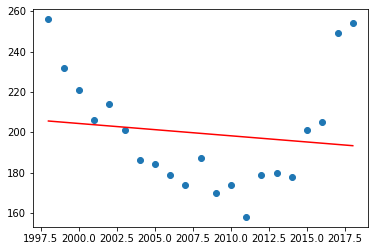

Number of Employees


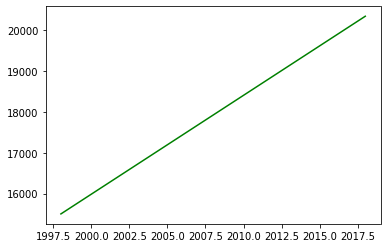



Merchant wholesalers, nondurable goods
Number of Establishments


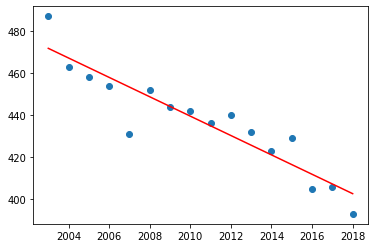

Number of Employees


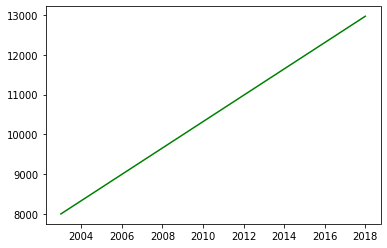



Chemical manufacturing
Number of Establishments


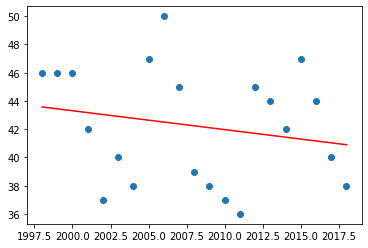

Number of Employees


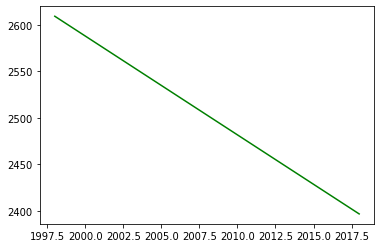



Securities, commodity contracts, and other financial investments and related activities
Number of Establishments


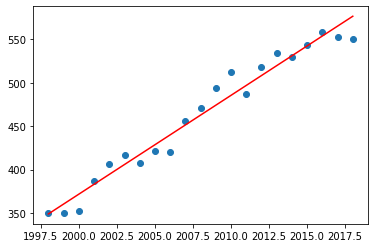

Number of Employees


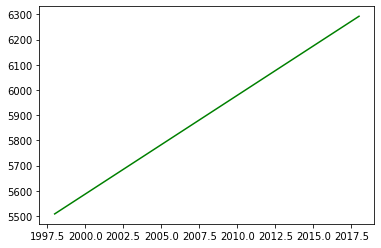



Air transportation
Number of Establishments


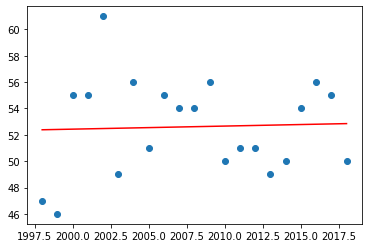

Number of Employees


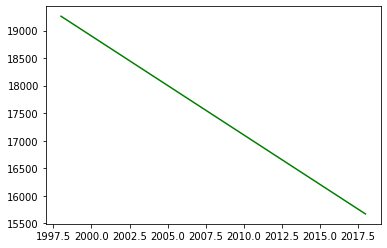



Credit intermediation and related activities
Number of Establishments


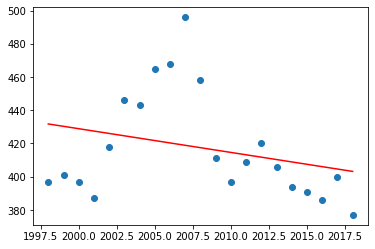

Number of Employees


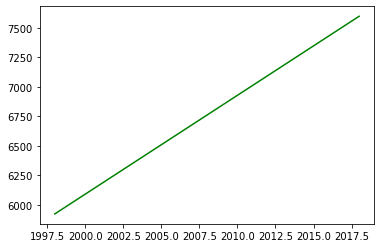



Ambulatory health care services
Number of Establishments


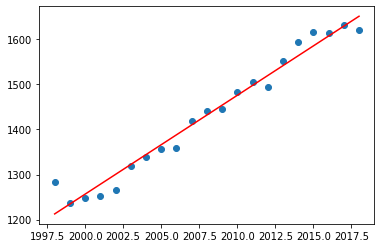

Number of Employees


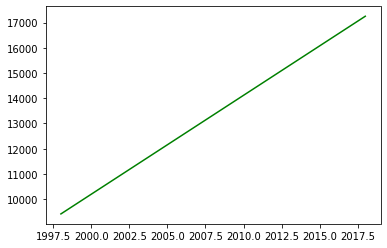



Management of companies and enterprises
Number of Establishments


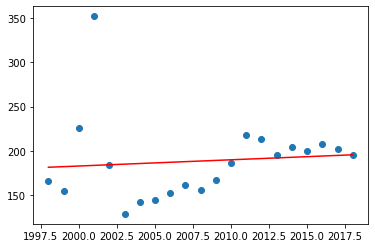

Number of Employees


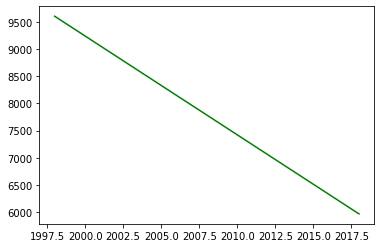

In [ ]:
temp = industries.copy()
temp = temp.reset_index().set_index("Code")
for i in list(top_2018.index):
  X = temp.loc[i].iloc[:, 0].values.reshape(-1, 1)
  Y = temp.loc[i].iloc[:, 4].values.reshape(-1, 1)
  PAY = temp.loc[i].iloc[:, 2].values.reshape(-1, 1)
  linear_regressor = LinearRegression()
  linear_regressor.fit(X, Y)
  Y_pred = linear_regressor.predict(X)

  linear_regressor = LinearRegression()
  linear_regressor.fit(X, PAY)
  PAY_pred = linear_regressor.predict(X)

  plt.scatter(X, Y)
  plt.plot(X, Y_pred, color="red")
  print(f"{top_2018.loc[i][1]}")
  print("Number of Establishments")
  plt.show()
  print("Number of Employees")
  plt.plot(X, PAY_pred, color="green")
  plt.show()
  print("\n")

<h1>LOS ANGELES COUNTY</h1>

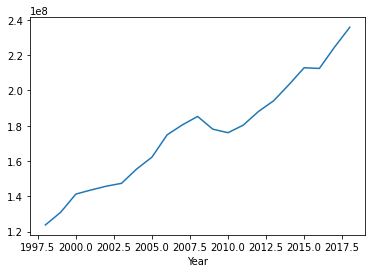

In [ ]:
state_1 = cleaned[1].copy()
state_1["Year"] = state_1["Year"].astype(int)
state_1.set_index(["Code", "Year"], inplace = True)
state_1["EMP"] = state_1["EMP"].astype(int)
state_1["PAYANN"] = state_1["PAYANN"].astype(int)
state_1["ESTAB"] = state_1["ESTAB"].astype(int)
state_1.loc["00"]["PAYANN"].plot()

In [ ]:
industries = state_1[state_1.index.map(lambda x: len(x[0]) == 3 and x[0] != "00" and len(x) == 2)]
ind_2018 = industries[industries.index.map(lambda x: x[1] == 2018)]
ind_2018 = ind_2018.reset_index().set_index("Code")
top_2018 = ind_2018.sort_values(by="PAYANN", ascending=False).iloc[0:10]
top_2018

,Year,Title,EMP,PAYANN,ESTAB,state,county
Code,,,,,,,
541,2018,"Professional, scientific, and technical services",299634,29186648,37383,6,037
622,2018,Hospitals,161556,13555002,120,6,037
621,2018,Ambulatory health care services,226090,13427120,26403,6,037
512,2018,Motion picture and sound recording industries,97661,10380033,7471,6,037
722,2018,Food services and drinking places,414082,9080965,22668,6,037
561,2018,Administrative and support services,225948,9033936,11010,6,037
423,2018,"Merchant wholesalers, durable goods",124242,8901633,10965,6,037
551,2018,Management of companies and enterprises,86650,8817908,1439,6,037
711,2018,"Performing arts, spectator sports, and related...",42875,8140068,15755,6,037


In [ ]:
industries = industries.reset_index().set_index("Code")
industries = industries[industries.index.map(lambda x: x in list(top_2018.index))]
industries = industries.reset_index().set_index(["Code", "Year"])

Professional, scientific, and technical services
Number of Establishments


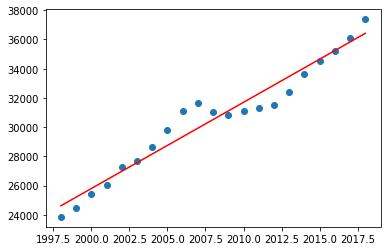

Number of Employees


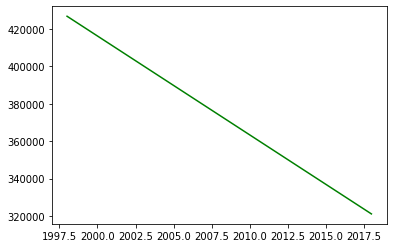



Hospitals
Number of Establishments


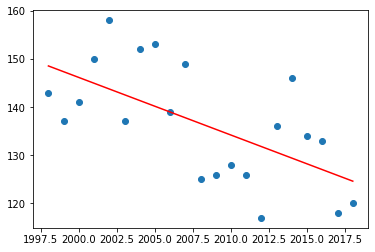

Number of Employees


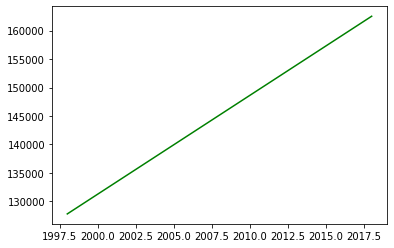



Ambulatory health care services
Number of Establishments


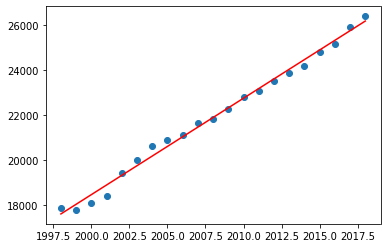

Number of Employees


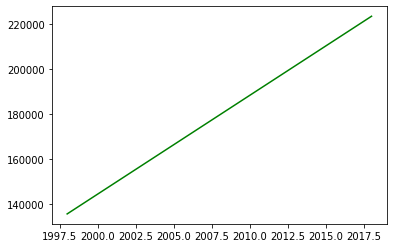



Motion picture and sound recording industries
Number of Establishments


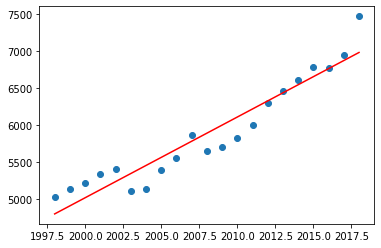

Number of Employees


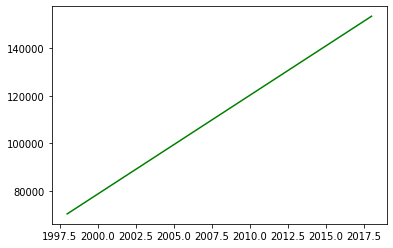



Food services and drinking places
Number of Establishments


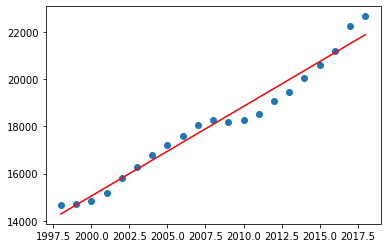

Number of Employees


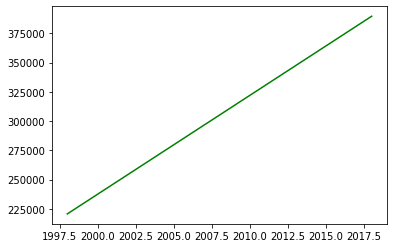



Administrative and support services
Number of Establishments


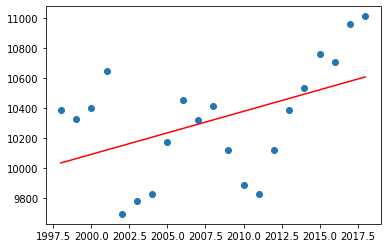

Number of Employees


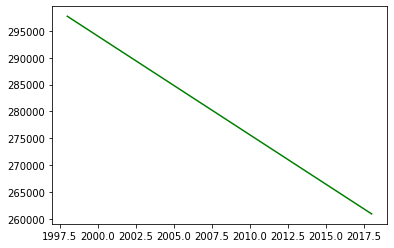



Merchant wholesalers, durable goods
Number of Establishments


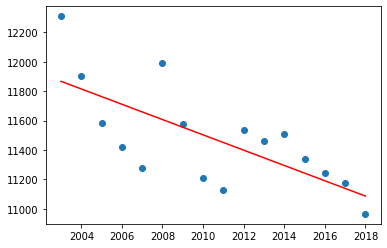

Number of Employees


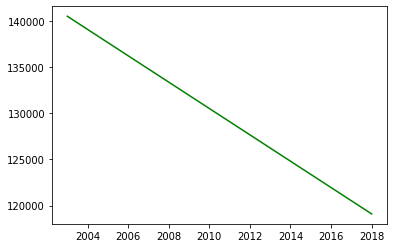



Management of companies and enterprises
Number of Establishments


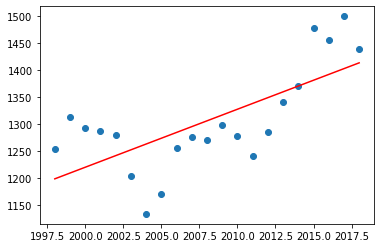

Number of Employees


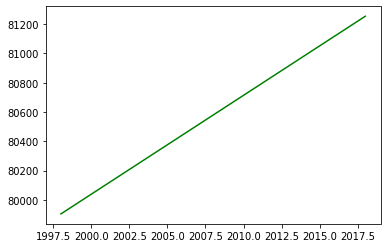



Performing arts, spectator sports, and related industries
Number of Establishments


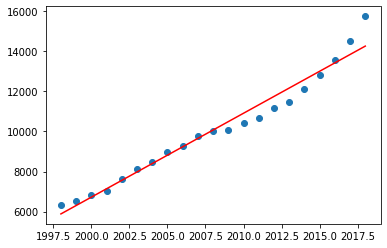

Number of Employees


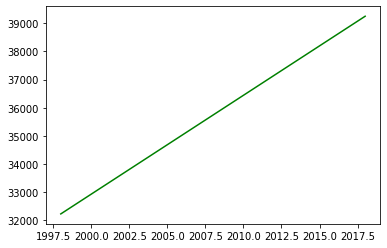



Securities, commodity contracts, and other financial investments and related activities
Number of Establishments


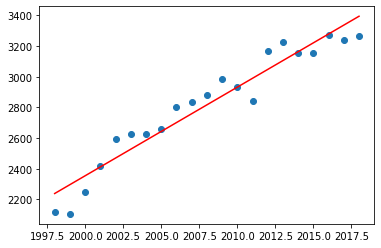

Number of Employees


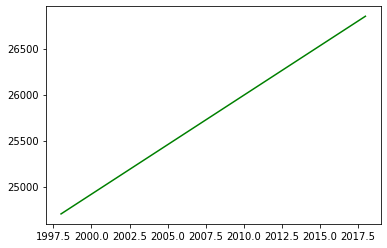

In [ ]:
temp = industries.copy()
temp = temp.reset_index().set_index("Code")
for i in list(top_2018.index):
  X = temp.loc[i].iloc[:, 0].values.reshape(-1, 1)
  Y = temp.loc[i].iloc[:, 4].values.reshape(-1, 1)
  PAY = temp.loc[i].iloc[:, 2].values.reshape(-1, 1)
  linear_regressor = LinearRegression()
  linear_regressor.fit(X, Y)
  Y_pred = linear_regressor.predict(X)

  linear_regressor = LinearRegression()
  linear_regressor.fit(X, PAY)
  PAY_pred = linear_regressor.predict(X)

  plt.scatter(X, Y)
  plt.plot(X, Y_pred, color="red")
  print(f"{top_2018.loc[i][1]}")
  print("Number of Establishments")
  plt.show()
  print("Number of Employees")
  plt.plot(X, PAY_pred, color="green")
  plt.show()
  print("\n")

<h1>SAN LUIS OBISPO COUNTY</h1>

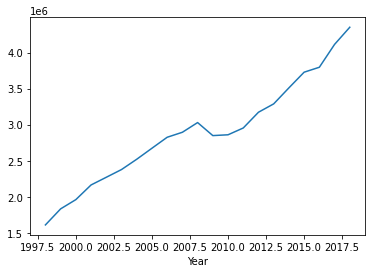

In [ ]:
state_1 = cleaned[2].copy()
state_1["Year"] = state_1["Year"].astype(int)
state_1.set_index(["Code", "Year"], inplace = True)
state_1["EMP"] = state_1["EMP"].astype(int)
state_1["PAYANN"] = state_1["PAYANN"].astype(int)
state_1["ESTAB"] = state_1["ESTAB"].astype(int)
state_1.loc["00"]["PAYANN"].plot()

In [ ]:
industries = state_1[state_1.index.map(lambda x: len(x[0]) == 3 and x[0] != "00" and len(x) == 2)]
ind_2018 = industries[industries.index.map(lambda x: x[1] == 2018)]
ind_2018 = ind_2018.reset_index().set_index("Code")
top_2018 = ind_2018.sort_values(by="PAYANN", ascending=False).iloc[0:10]
top_2018

,Year,Title,EMP,PAYANN,ESTAB,state,county
Code,,,,,,,
221,2018,Utilities,1850,344488,19,6,079
622,2018,Hospitals,4395,338897,6,6,079
621,2018,Ambulatory health care services,5751,332068,765,6,079
541,2018,"Professional, scientific, and technical services",5035,326246,954,6,079
722,2018,Food services and drinking places,13302,277228,798,6,079
238,2018,Specialty trade contractors,4347,267297,620,6,079
561,2018,Administrative and support services,4321,174752,392,6,079
511,2018,Publishing industries (except internet),1528,163209,33,6,079
237,2018,Heavy and civil engineering construction,1176,114927,63,6,079


In [ ]:
industries = industries.reset_index().set_index("Code")
industries = industries[industries.index.map(lambda x: x in list(top_2018.index))]
industries = industries.reset_index().set_index(["Code", "Year"])

Utilities
Number of Establishments


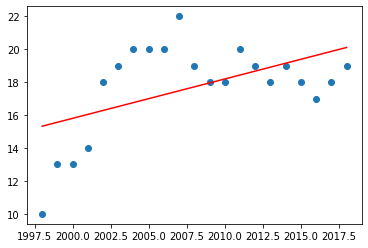

Number of Employees


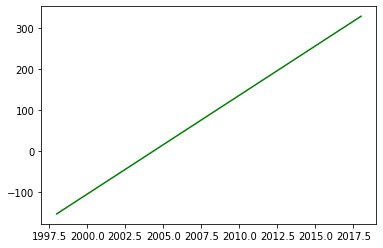



Hospitals
Number of Establishments


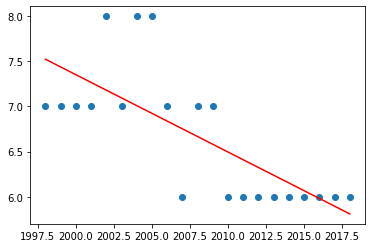

Number of Employees


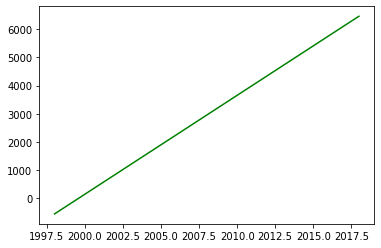



Ambulatory health care services
Number of Establishments


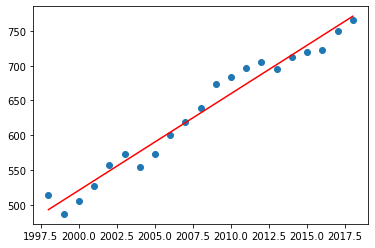

Number of Employees


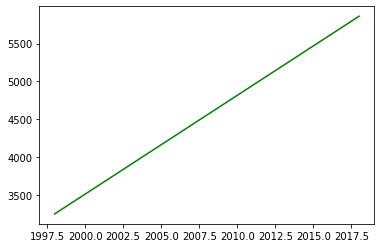



Professional, scientific, and technical services
Number of Establishments


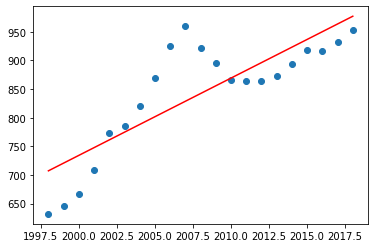

Number of Employees


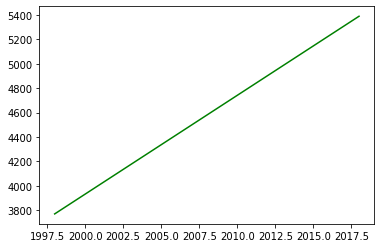



Food services and drinking places
Number of Establishments


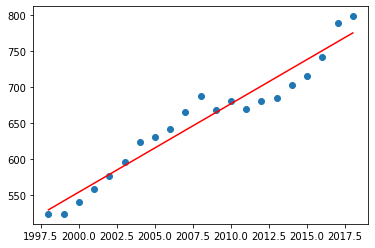

Number of Employees


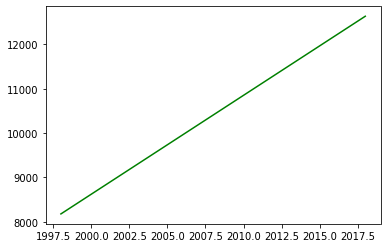



Specialty trade contractors
Number of Establishments


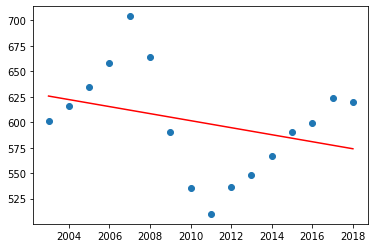

Number of Employees


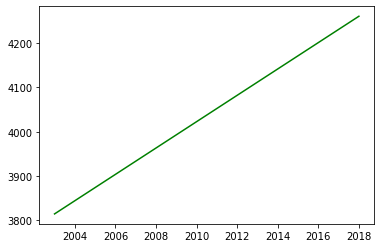



Administrative and support services
Number of Establishments


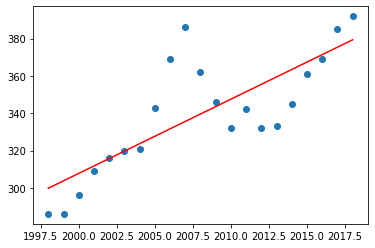

Number of Employees


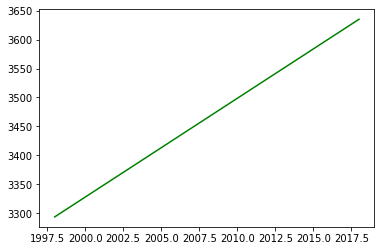



Publishing industries (except internet)
Number of Establishments


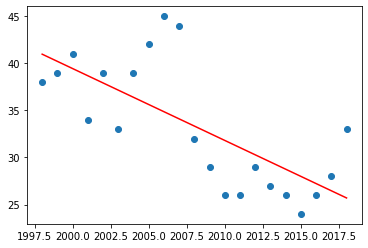

Number of Employees


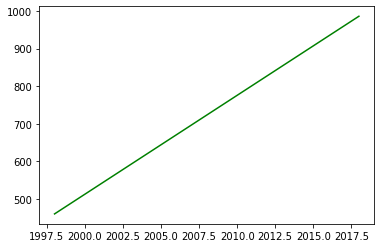



Heavy and civil engineering construction
Number of Establishments


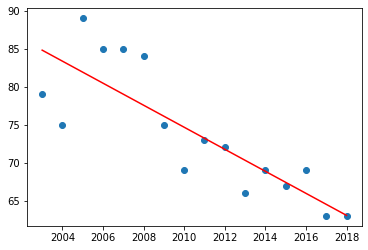

Number of Employees


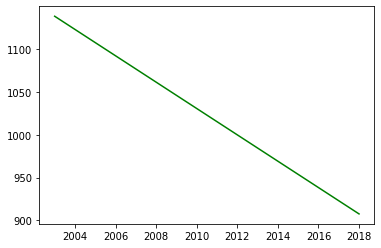



Construction of buildings
Number of Establishments


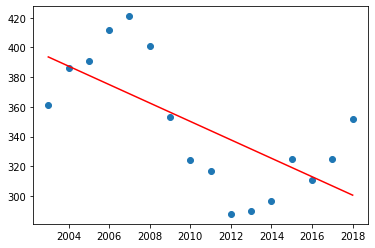

Number of Employees


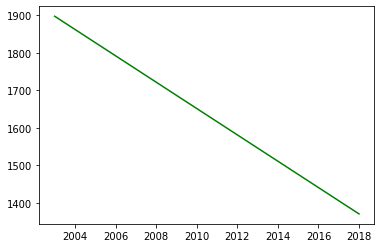

In [ ]:
temp = industries.copy()
temp = temp.reset_index().set_index("Code")
for i in list(top_2018.index):
  X = temp.loc[i].iloc[:, 0].values.reshape(-1, 1)
  Y = temp.loc[i].iloc[:, 4].values.reshape(-1, 1)
  PAY = temp.loc[i].iloc[:, 2].values.reshape(-1, 1)
  linear_regressor = LinearRegression()
  linear_regressor.fit(X, Y)
  Y_pred = linear_regressor.predict(X)

  linear_regressor = LinearRegression()
  linear_regressor.fit(X, PAY)
  PAY_pred = linear_regressor.predict(X)

  plt.scatter(X, Y)
  plt.plot(X, Y_pred, color="red")
  print(f"{top_2018.loc[i][1]}")
  print("Number of Establishments")
  plt.show()
  print("Number of Employees")
  plt.plot(X, PAY_pred, color="green")
  plt.show()
  print("\n")